1 Feature

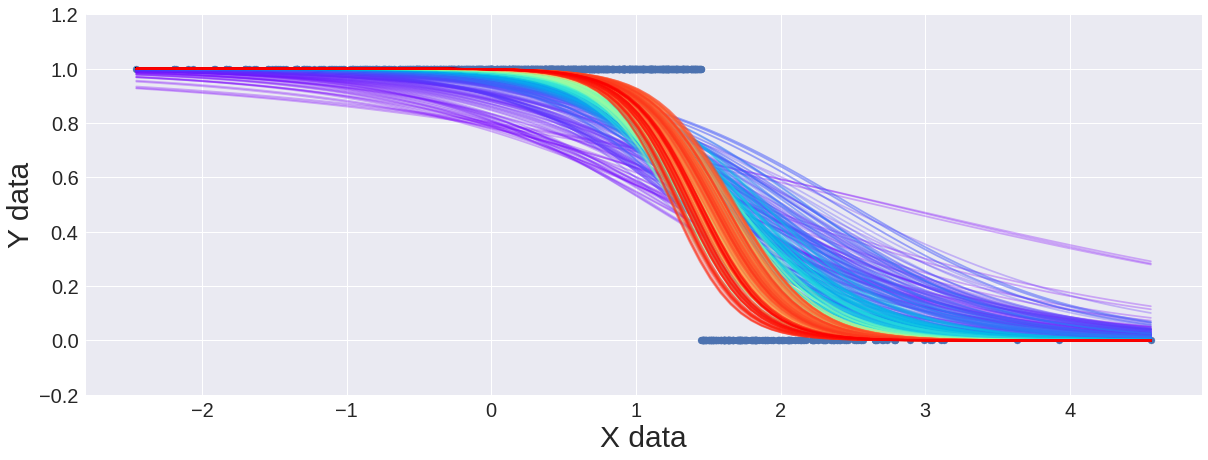

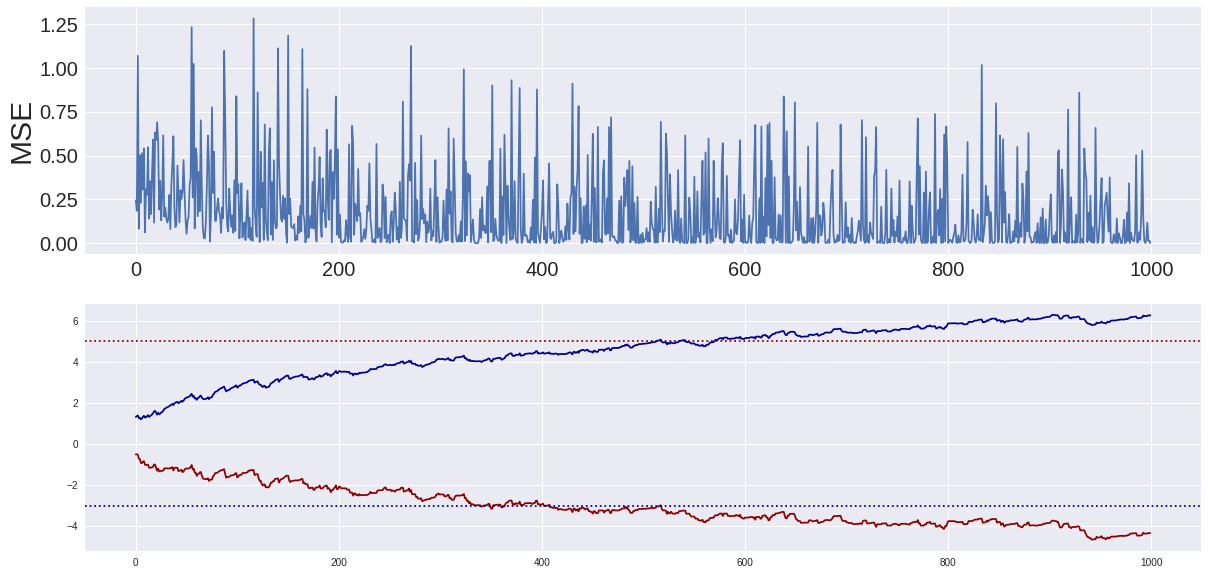

In [17]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
plt.style.use('seaborn')

# set params
n_data = 1000
lr = 0.2
t_w, t_b = 5, -3
w,b = np.random.uniform(-3,3,2) # initial weight, bias

# generate dataset
t_decision_boundary = -(t_b/t_w)
x_data = np.random.normal(t_decision_boundary,1,(n_data, ))

y_data = x_data * w + b
y_data = (y_data > t_decision_boundary ).astype(np.int32) # BCCE 이기 때문에 0 or 1 로 결과가 나오게 한다

# visualize dataset
cmap = plt.get_cmap('rainbow',lut=n_data)
fig, ax = plt.subplots(figsize=(20,7))
ax.scatter(x_data,y_data)
ax.set_xlabel('X data', fontsize=30)
ax.set_ylabel('Y data', fontsize=30)
ax.tick_params(labelsize=20)
ax.set_ylim([-0.2,1.2])

# set x range for visualization of model
x_range = np.linspace(x_data.min(),x_data.max(),100)

# train model and visualize updated model
J_track = list()
w_track, b_track = list(),list()
for data_idx, (x,y) in enumerate(zip(x_data,y_data)):
  w_track.append(w)
  b_track.append(b)

  # visualize update model
  y_range = w*x_range + b
  y_range = 1/(1+np.exp(-y_range))
  ax.plot(x_range, y_range, color = cmap(data_idx), alpha=0.3)

  # loss calculation
  pred = x*w+b
  pred = 1/(1+np.exp(-pred))
  J = -(y*np.log(pred)+(1-y)*np.log(1-pred))
  J_track.append(J)

  # jacobian
  dJ_dpred = (pred-y)/(pred*(1-pred)) # loss
  dpred_dz = pred*(1-pred) # sigmoid
  dz_dw = x
  dz_db = 1

  # backpropagation
  dJ_dz = dJ_dpred*dpred_dz
  dJ_dw = dJ_dz*dz_dw
  dJ_db = dJ_dz*dz_db

  # train model
  w= w - lr*dJ_dw
  b = b - lr*dJ_db

# visualize loss
fig,axes = plt.subplots(2,1,figsize=(20,10))
axes[0].plot(J_track)
axes[0].set_ylabel('MSE',fontsize=30)
axes[0].tick_params(labelsize=20)

axes[1].axhline(y=t_w, color='darkred', linestyle=':')
axes[1].plot(w_track, color='darkred')
axes[1].axhline(y=t_b, color='darkblue', linestyle=':')
axes[1].plot(b_track, color='darkblue')
axes[0].tick_params(labelsize=20)
# 결과를 보면  sigmoid는 점점 step function에 다가가고
# step function이 되어 가니까 loss가 미약하게 나마 줄어들고 있다
# 그리고 w, b는 발산하는 걸 확인 할 수있다. 그런데 b의 발산 속도가 좀 더 빠른 것은 decision_boundary의 비율에 맞게 변화하기 때문이다.

(1000,) (1000,)
(1000,)


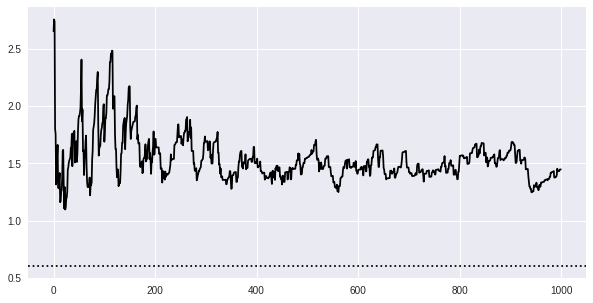

In [18]:
w_track = np.array(w_track)
b_track = np.array(b_track)

print(w_track.shape, b_track.shape)

db_track = -b_track/w_track
db = -t_b/t_w

print(db_track.shape)
fig,ax = plt.subplots(figsize=(10,5))
ax.axhline(y=db, color='black', linestyle=':')
ax.plot(db_track, color='black') 
# 위에 결과 에서는 w,b가 발산 했지만 db는 점점 유지되는 걸 확인 할 수있다.

N features

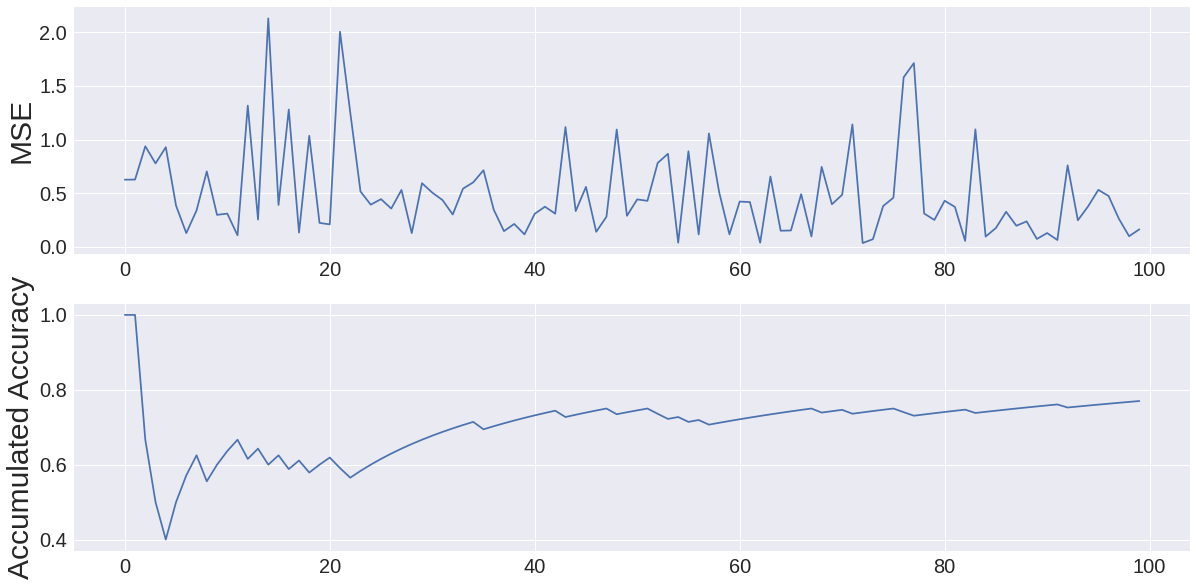

In [21]:
from itertools import zip_longest
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
plt.style.use('seaborn')

# set params
n_data, n_feature = 100,3
lr = 0.03
t_w = np.random.uniform(-1,1,(n_feature,1)) # target weights
t_b = np.random.uniform(-1,1,(1, )) # target bias
w =  np.random.uniform(-1,1,(n_feature,1)) # initial weight
b = np.random.uniform(-1,1,(1, )) # initial bias

# generate dataset
x_data = np.random.randn(n_data,n_feature)
y_data = x_data @ t_w + t_b # @ -> matrix multiplication
y_data = 1/(1+np.exp(-y_data))
y_data = (y_data > 0.5 ).astype(np.int) # BCCE 이기 때문에 0 or 1 로 결과가 나오게 한다

J_track, acc_track = list(),list()
n_correct = 0

for data_idx, (x,y) in enumerate(zip(x_data,y_data)):
  # train model
  z = x@w + b
  pred = 1/(1+np.exp(-z))

  J = -(y*np.log(pred)+(1-y)*np.log(1-pred))
  J_track.append(J.squeeze())

  # calculate accumulated accuracy
  pred_ = (pred > 0.5).astype(np.int)
  if pred_ == y: # 예측값과 실제값이 같으면
    n_correct +=1
  acc_track.append(n_correct/(data_idx+1))
  
  # jacobian
  dJ_dpred = (pred-y)/(pred*(1-pred)) # loss
  dpred_dz = pred*(1-pred) # sigmoid
  dz_dw = x.reshape(1,-1) # x 가 vector 이기 때문에 , 그리고 x의 colum이 w의 row가 되기 때문에 reshape으로 row벡터로 바꿈
  dz_db = 1

  # backpropagation
  dJ_dz = dJ_dpred*dpred_dz
  dJ_dw = dJ_dz*dz_dw
  dJ_db = dJ_dz*dz_db

  # train model
  w= w - lr*dJ_dw.T
  b = b - lr*dJ_db

# visualize loss
fig,axes = plt.subplots(2,1,figsize=(20,10))
axes[0].plot(J_track)
axes[1].plot(acc_track)
axes[0].set_ylabel('MSE',fontsize=30)
axes[0].tick_params(labelsize=20)
axes[1].set_ylabel('Accumulated Accuracy',fontsize=30)
axes[1].tick_params(labelsize=20)
# 결과를 보면 MSE는 점점 감소하긴 하지만 학습이 제대로 됬는지 보기 애매하다. 왜냐하면 simoid에는 계속 loss가 발생하고 있으니까
# 그런데 accuracy 즉, 정답을 맞는 개수는 점점 늘어나는 것을 확인 할 수있다.